# Proyecto 4 - Series de Tiempo Informe Final 

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

Como ultimo proyecto de la carrera elegi profundizar sobre la serie de tiempo y los modelos de prediccion del flujo en la Autopista Illia paara pagos en efectivo, teniendo como datos los años de 2017 a 2019. Los modelos utilizados fueron One-Step y Multi-Step, con un RandomForest y optimizando sus Hiperparametros. 

Para este proyecto planteamos resolver las siguientes preguntas. 

- ¿Que paso en la fecha de los Outliers?
- ¿Podria mejorar el modelo incorporando distintos metodos de pago? 
- ¿Si incorporamos años anteriores?
- ¿Si incorporamos ambos?

Estos nuevos modelos los vamos a implementar utilizando la libreria de facebook, sugerida en la cursada, llamada Prophet. 

### Importamos las Librerias

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics



### Importamos los datasets

In [106]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('flujo-vehicular-2015.csv', sep =',')
data_2014 = pd.read_csv('flujo-vehicular-2014.csv', sep =',')

### Exploramos brevemente los nuevos datasets incluidos

In [107]:
print('AÑO 2014: ', data_2014.info(), '\n')
print('AÑO 2015: ', data_2015.info(), '\n')
print('AÑO 2016: ', data_2016.info(), '\n')
print('AÑO 2020: ', data_2020.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809376 entries, 0 to 809375
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   periodo         809374 non-null  float64
 1   fecha           809374 non-null  object 
 2   hora            809374 non-null  float64
 3   dia             809374 non-null  object 
 4   estacion        809374 non-null  object 
 5   tipo_vehiculo   809374 non-null  object 
 6   forma_pago      809374 non-null  object 
 7   cantidad_pasos  809375 non-null  float64
dtypes: float64(3), object(5)
memory usage: 49.4+ MB
AÑO 2014:  None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia         

In [108]:
print(data_2016.forma_pago.unique())
data_2014

['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2014.0,2014-01-01,0.0,Miercoles,Alberdi,Liviano,NO COBRADO,26.0
1,2014.0,2014-01-01,0.0,Miercoles,Alberdi,Liviano,EFECTIVO,2.0
2,2014.0,2014-01-01,0.0,Miercoles,Alberdi,Liviano,NO COBRADO,1.0
3,2014.0,2014-01-01,0.0,Miercoles,Alberdi,Liviano,EFECTIVO,64.0
4,2014.0,2014-01-01,0.0,Miercoles,Alberdi,Liviano,AUPASS,17.0
...,...,...,...,...,...,...,...,...
809371,2014.0,2014-12-31,21.0,Miercoles,Sarmiento,Liviano,AUPASS,82.0
809372,2014.0,2014-12-31,22.0,Miercoles,Sarmiento,Liviano,NO COBRADO,5.0
809373,2014.0,2014-12-31,22.0,Miercoles,Sarmiento,Liviano,AUPASS,5.0
809374,2014.0,2014-12-31,23.0,Miercoles,Sarmiento,Liviano,NO COBRADO,2.0


In [109]:
print(data_2015.forma_pago.unique())
data_2015.head()

['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2015,2015-01-01,0,Jueves,Alberdi,Liviano,NO COBRADO,15
1,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EFECTIVO,1
2,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EXENTO,1
3,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EFECTIVO,68
4,2015,2015-01-01,0,Jueves,Alberdi,Liviano,AUPASS,18


In [110]:
print(data_2016.forma_pago.unique())
data_2016.head()

['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


In [111]:
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [112]:
data_2020.tipo_vehiculo.unique()

array(['Auto', 'Auto con trailer', 'Moto', 'N/D', 'Pago Doble Auto',
       'Pago Doble Auto con trailer / Pesado 2 Ejes', 'Pago doble Moto',
       'Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes',
       'Pesados 5 Ejes', 'Pesados 6 Ejes'], dtype=object)

In [113]:
data_2020.forma_pago.unique()

array(['Efectivo', 'Rec.Deuda', 'Tarjeta Magnética', 'Tag', 'Exento',
       'Violación', 'CPP', 'Mercado Pago'], dtype=object)

### Hacemos Modificaciones y Concatenamos 

In [252]:
dataset = pd.concat([data_2019, data_2018, data_2017, data_2016])
data_1415 = pd.concat([data_2015, data_2014])
#Vamos a utilizar la estacion Illia pero agregamos los metodos de pagos 'NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO'

dataset.drop(columns = ['hora_inicio', 'sentido'], inplace = True)
dataset.rename(columns = {'hora_fin':'hora'}, inplace = True)

dataset = pd.concat([dataset, data_1415])

dataset = dataset[dataset.estacion=='Illia']
dataset.drop(columns = ['tipo_vehiculo'], inplace = True)

mascara1 = np.logical_or(dataset.forma_pago == 'EFECTIVO', dataset.forma_pago == 'EXENTO')
dataset1 = dataset[mascara1]

mascara2 = np.logical_or(dataset.forma_pago == 'NO COBRADO', dataset.forma_pago == 'AUPASS')
dataset2 = dataset[mascara2]

dataset = pd.concat([dataset1, dataset2])

dataset.drop_duplicates(inplace=True)


dataset['fecha2'] = pd.to_datetime(dataset.fecha)
dataset.drop(columns=['fecha'], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()
#dataset.set_index('fecha', inplace = True)

,periodo,hora,dia,estacion,forma_pago,cantidad_pasos,fecha
80,2019.0,2.0,Martes,Illia,EFECTIVO,537.0,2019-01-01
81,2019.0,2.0,Martes,Illia,EXENTO,3.0,2019-01-01
86,2019.0,2.0,Martes,Illia,EFECTIVO,1.0,2019-01-01
88,2019.0,2.0,Martes,Illia,EFECTIVO,443.0,2019-01-01
89,2019.0,2.0,Martes,Illia,EXENTO,7.0,2019-01-01


In [253]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844357 entries, 80 to 809007
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   periodo         844357 non-null  float64       
 1   hora            844357 non-null  float64       
 2   dia             844357 non-null  object        
 3   estacion        844357 non-null  object        
 4   forma_pago      844357 non-null  object        
 5   cantidad_pasos  844357 non-null  float64       
 6   fecha           844357 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 51.5+ MB


In [254]:
dataset.head()

,periodo,hora,dia,estacion,forma_pago,cantidad_pasos,fecha
80,2019.0,2.0,Martes,Illia,EFECTIVO,537.0,2019-01-01
81,2019.0,2.0,Martes,Illia,EXENTO,3.0,2019-01-01
86,2019.0,2.0,Martes,Illia,EFECTIVO,1.0,2019-01-01
88,2019.0,2.0,Martes,Illia,EFECTIVO,443.0,2019-01-01
89,2019.0,2.0,Martes,Illia,EXENTO,7.0,2019-01-01


In [255]:
f_pago = dataset.groupby(["dia", "forma_pago"]).cantidad_pasos.sum().reset_index().sort_values('dia')
f_pago


,dia,forma_pago,cantidad_pasos
0,Domingo,AUPASS,2511352.0
1,Domingo,EFECTIVO,11731451.0
2,Domingo,EXENTO,108633.0
3,Domingo,NO COBRADO,315679.0
4,Jueves,AUPASS,6416903.0
5,Jueves,EFECTIVO,15823451.0
6,Jueves,EXENTO,244902.0
7,Jueves,NO COBRADO,682689.0
11,Lunes,NO COBRADO,545630.0
10,Lunes,EXENTO,212761.0


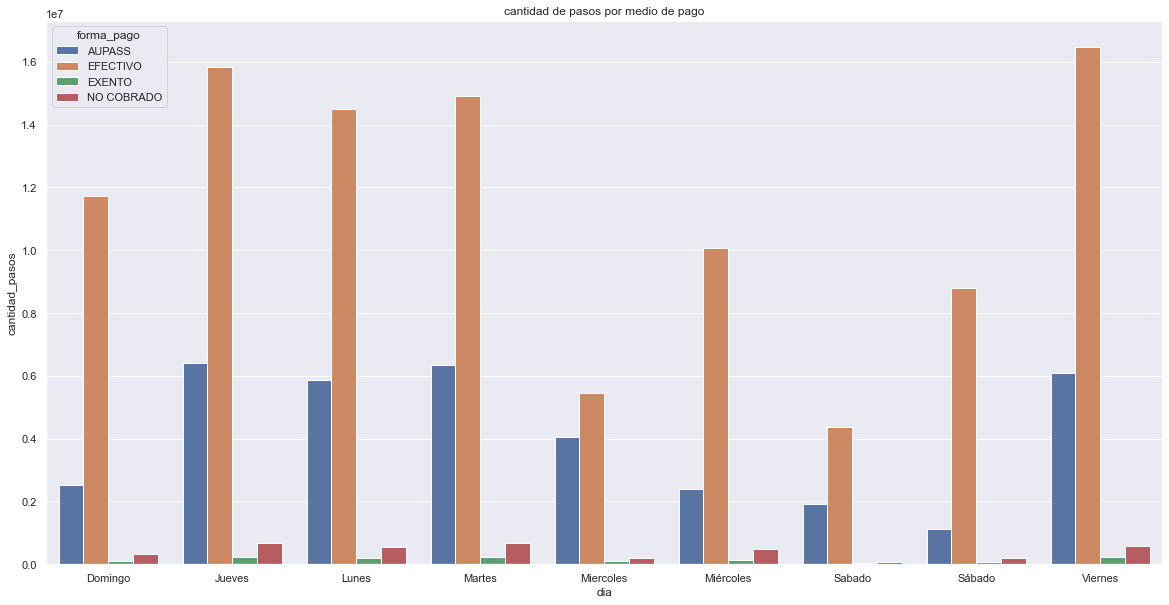

In [256]:
plt.figure(figsize = (20,10))
plt.title('cantidad de pasos por medio de pago')
sns.barplot(data = f_pago, x = 'dia', y = 'cantidad_pasos', hue = 'forma_pago')
plt.show()

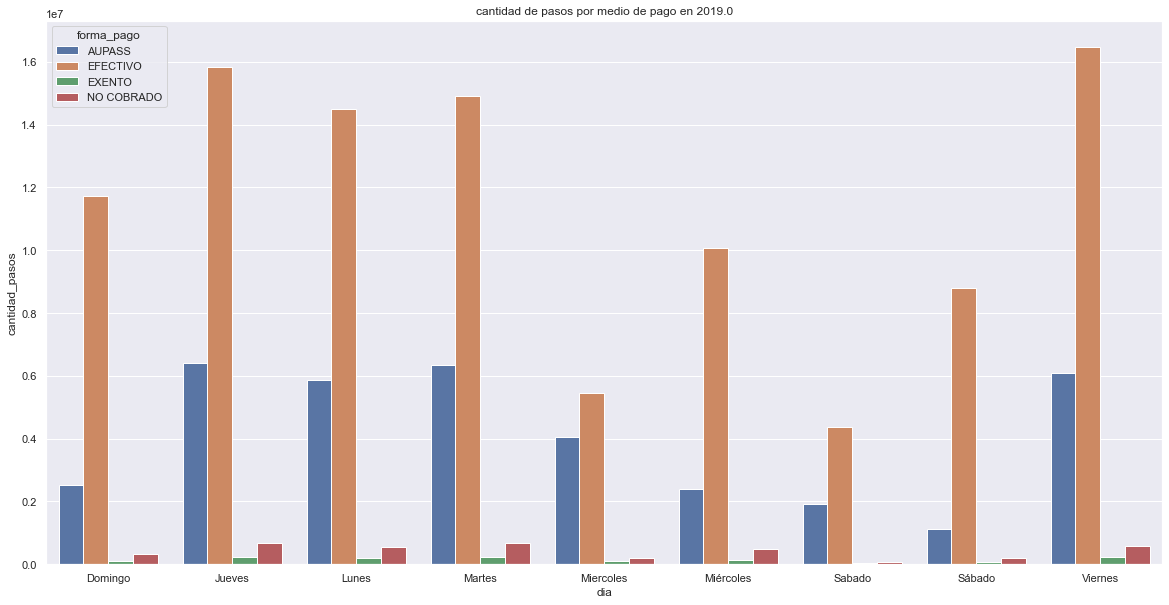

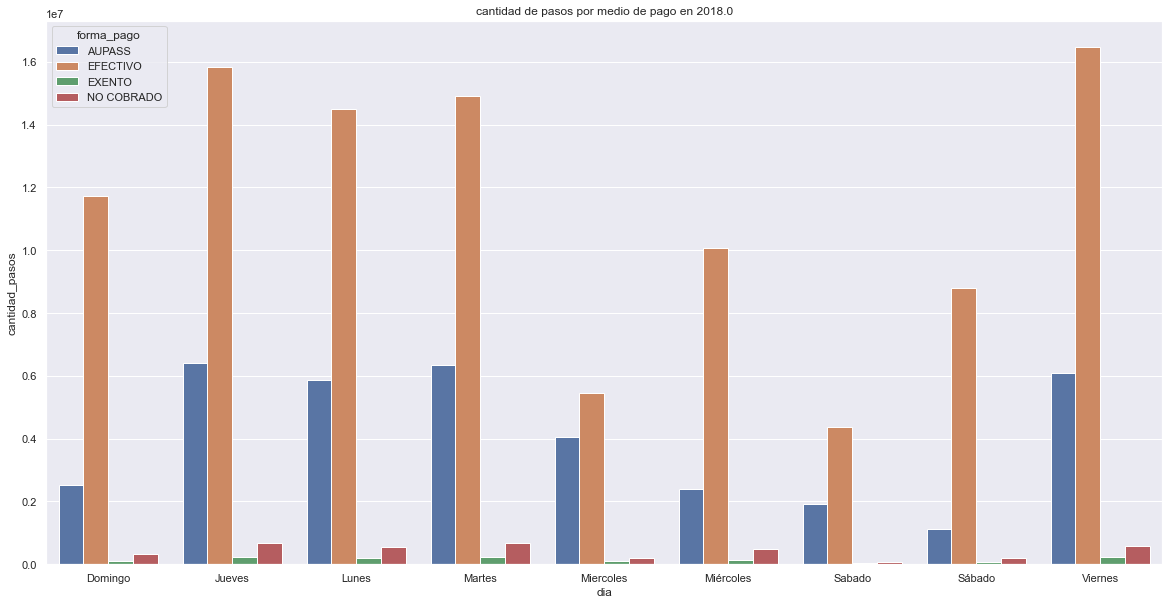

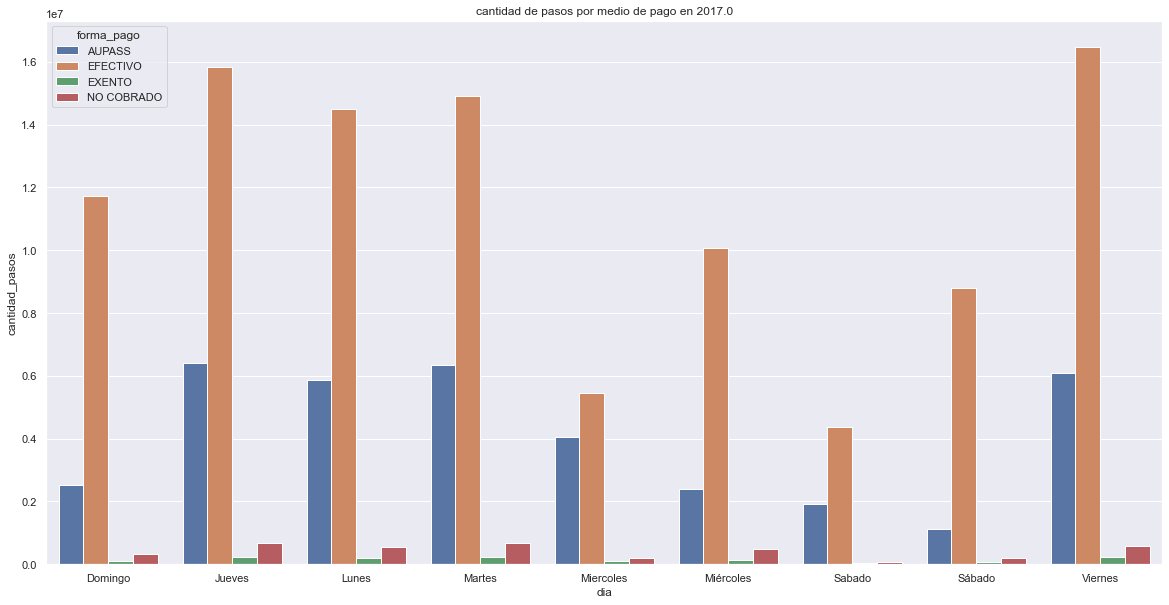

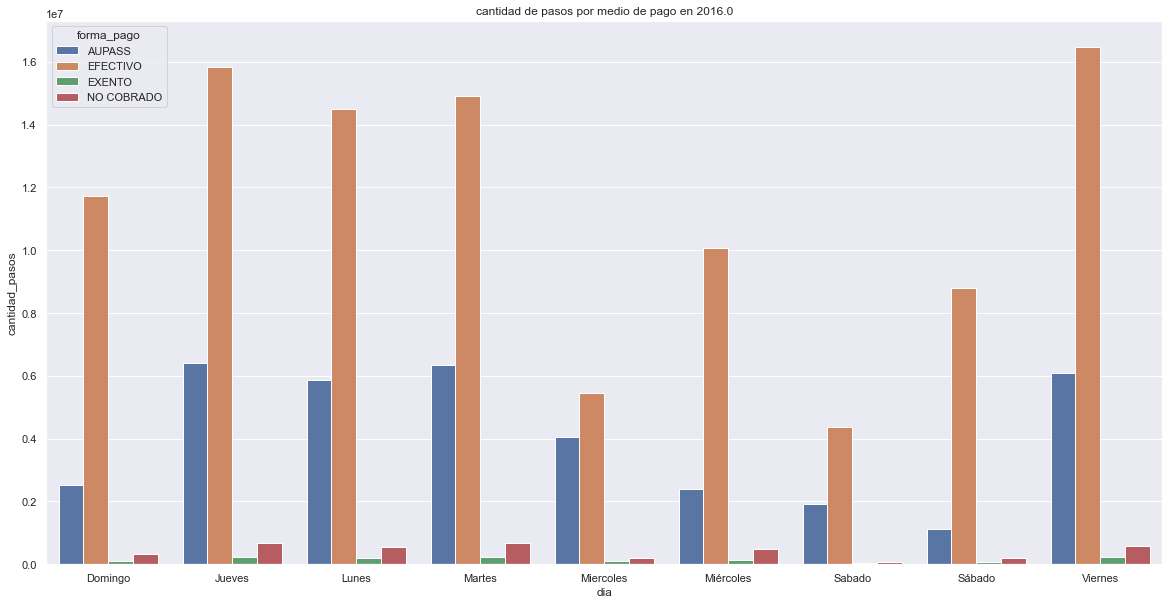

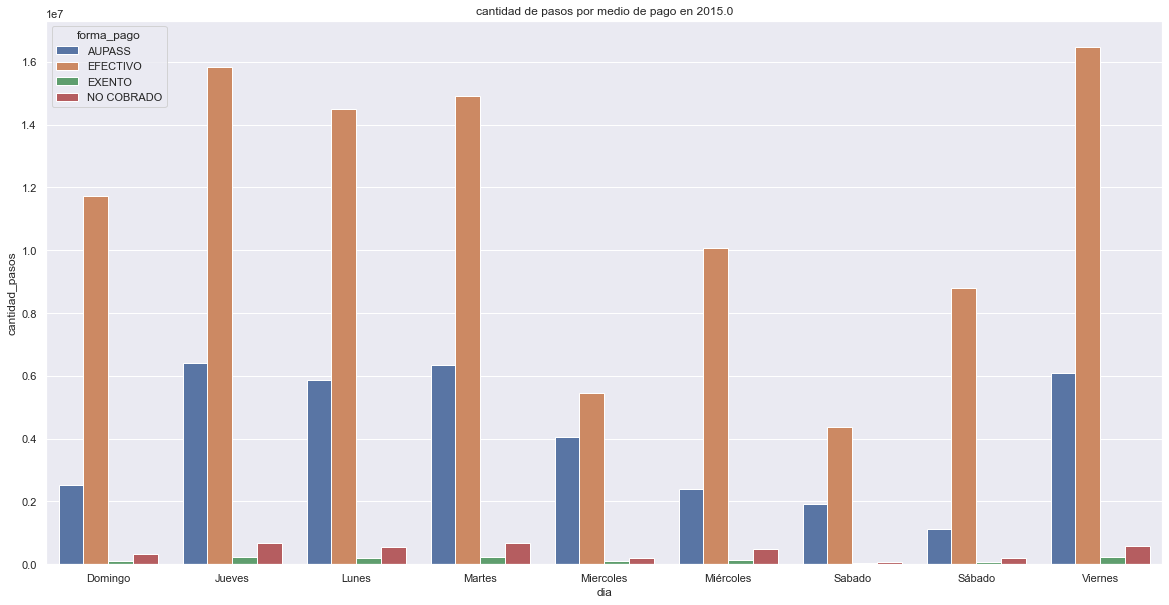

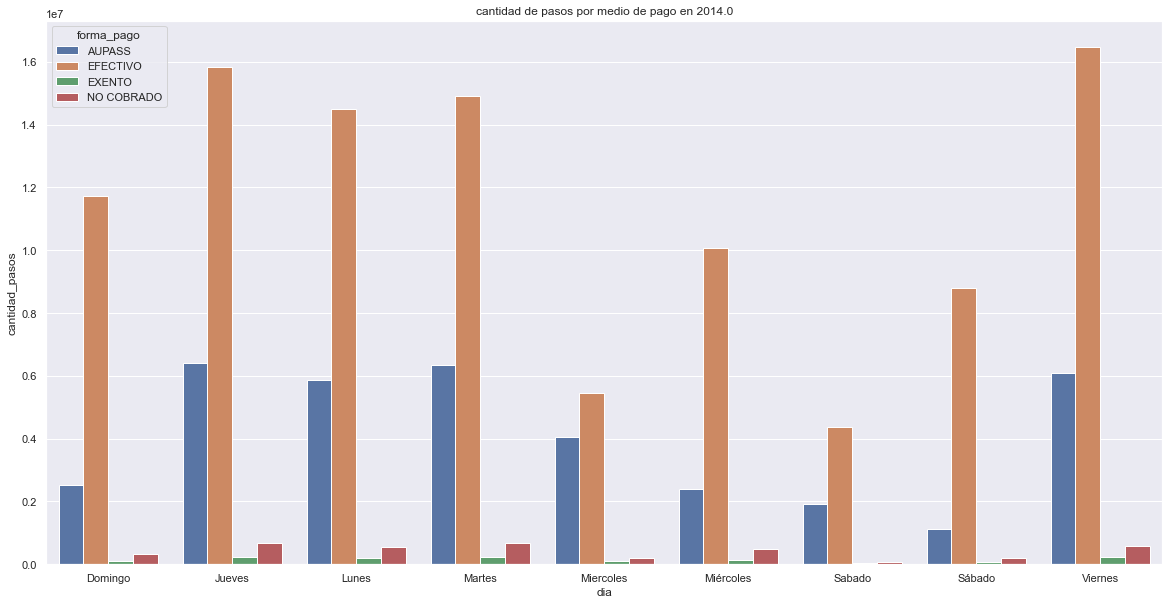

In [257]:
for i in dataset.periodo.unique():
  data = dataset[dataset.periodo == i ]
  fp = dataset.groupby(["dia", "forma_pago"]).cantidad_pasos.sum().reset_index().sort_values('dia')
  plt.figure(figsize = (20,10))
  plt.title('cantidad de pasos por medio de pago en ' + str(i))
  sns.barplot(data = fp, x = 'dia', y = 'cantidad_pasos', hue = 'forma_pago')
  plt.show()

### PREGUNTA 1 : ¿Que paso en la fecha de los outliers? 

siguiendo un poco mas en profundidad con el EDA, vamos a analizar el surgimiento de los outliers, suponiendo que un evento inusual afecto el flujo vehicular.

In [403]:
diario = dataset.resample('D', on = 'fecha').sum()
diario.drop(columns = ['periodo'], inplace = True)
print(diario.shape)
#diario = diario.reset_index()
diario.head()


(2191, 2)


,hora,cantidad_pasos
fecha,,
2014-01-01,2226.0,10412.0
2014-01-02,3648.0,28377.0
2014-01-03,3480.0,59437.0
2014-01-04,364.0,47.0
2014-01-05,206.0,22.0


In [404]:
diario_2017 = pd.DataFrame(diario['2017'], columns = ['cantidad_pasos'], copy = True)
diario_2018 = pd.DataFrame(diario['2018'], columns = ['cantidad_pasos'], copy = True)
diario_2019 = pd.DataFrame(diario['2019'], columns = ['cantidad_pasos'], copy = True)

In [405]:
media_2017 = diario_2017.mean()
std_2017 = diario_2017.std()

outliers_2017  = diario_2017[((diario_2017 < (media_2017 - 3* std_2017)) |(diario_2017 > (media_2017 + 3* std_2017))).any(axis=1)]
filtrado_2017 = diario_2017[~((diario_2017 < (media_2017 - 3* std_2017)) |(diario_2017 > (media_2017 + 3* std_2017))).any(axis=1)]

print("\nTAMAÑO ORIGINAL DEL DF:\n", diario_2017.shape)
print("\nTAMAÑO DEL DF FILTRADO:\n", filtrado_2017.shape)
print("\n% DE INSTANCIAS CON VALORES OUTLIERS SOBRE LA TOTALIDAD DE LAS INSTANCIAS DEL diario_2017:", "{0:.3%}".format(len(outliers_2017.index)/len(diario_2017.index)))


TAMAÑO ORIGINAL DEL DF:
 (365, 1)

TAMAÑO DEL DF FILTRADO:
 (363, 1)

% DE INSTANCIAS CON VALORES OUTLIERS SOBRE LA TOTALIDAD DE LAS INSTANCIAS DEL diario_2017: 0.548%


In [406]:
media_2018 = diario_2018.mean()
std_2018 = diario_2018.std()

outliers_2018  = diario_2018[((diario_2018 < (media_2018 - 3* std_2018)) |(diario_2018 > (media_2018 + 3* std_2018))).any(axis=1)]
filtrado_2018 = diario_2018[~((diario_2018 < (media_2018 - 3* std_2018)) |(diario_2018 > (media_2018 + 3* std_2018))).any(axis=1)]

print("\nTAMAÑO ORIGINAL DEL DF:\n", diario_2018.shape)
print("\nTAMAÑO DEL DF FILTRADO:\n", filtrado_2018.shape)
print("\n% DE INSTANCIAS CON VALORES OUTLIERS SOBRE LA TOTALIDAD DE LAS INSTANCIAS DEL diario_2018:", "{0:.3%}".format(len(outliers_2018.index)/len(diario_2018.index)))


TAMAÑO ORIGINAL DEL DF:
 (365, 1)

TAMAÑO DEL DF FILTRADO:
 (361, 1)

% DE INSTANCIAS CON VALORES OUTLIERS SOBRE LA TOTALIDAD DE LAS INSTANCIAS DEL diario_2018: 1.096%


In [407]:
media_2019 = diario_2019.mean()
std_2019 = diario_2019.std()

outliers_2019  = diario_2019[((diario_2019 < (media_2019 - 3* std_2019)) |(diario_2019 > (media_2019 + 3* std_2019))).any(axis=1)]
filtrado_2019 = diario_2019[~((diario_2019 < (media_2019 - 3* std_2019)) |(diario_2019 > (media_2019 + 3* std_2019))).any(axis=1)]

print("\nTAMAÑO ORIGINAL DEL DF:\n", diario_2019.shape)
print("\nTAMAÑO DEL DF FILTRADO:\n", filtrado_2019.shape)
print("\n% DE INSTANCIAS CON VALORES OUTLIERS SOBRE LA TOTALIDAD DE LAS INSTANCIAS DEL diario_2019:", "{0:.3%}".format(len(outliers_2019.index)/len(diario_2019.index)))


TAMAÑO ORIGINAL DEL DF:
 (365, 1)

TAMAÑO DEL DF FILTRADO:
 (362, 1)

% DE INSTANCIAS CON VALORES OUTLIERS SOBRE LA TOTALIDAD DE LAS INSTANCIAS DEL diario_2019: 0.822%


In [408]:
outliers = pd.concat([outliers_2017,outliers_2018,outliers_2019] )
outliers

,cantidad_pasos
fecha,
2017-12-24,27396.0
2017-12-31,23789.0
2018-06-25,85099.0
2018-09-25,78690.0
2018-11-30,387.0
2018-12-01,819.0
2019-01-13,20234.0
2019-05-29,87419.0
2019-12-01,20890.0


- 2017-12-24    pasos = 27396.0 (Navidad)
- 2017-12-31	pasos = 23789.0 (Año Nuevo)
- 2018-06-25	pasos = 85099.0 (No se encontraron noticias inusuales)
- 2018-09-25	pasos = 78690.0 (Marchas populares, aunque no creo que tenga que ver con el transito, debido a la ubicacion de la marcha)
- 2018-11-30	pasos = 387.0 (Feriado G20)
- 2018-12-01	pasos = 819.0 (Feriado G20)
- 2019-01-13	pasos = 20234.0 (Cierra el transito por Autopista Illia. https://www.buenosaires.gob.ar/movilidad/noticias/este-fin-de-semana-se-cerrara-al-transito-la-au-illia-sentido-al-centro)
- 2019-05-29	pasos = 87419.0 (Mayor Huelga contra el gobierno de Mauricio Macri)
- 2019-12-01	pasos = 20890.0  (no se encontro noticia que podria afectar al transito)

### Pregunta 2 : ¿Podria mejorar el modelo incorporando distintos metodos de pago? 

En este caso vamos a usar el dataset armado pero solo con los años que utilizamos para el proyecto anterior, y asi comprarlo. Para este caso vamos a aplicar la libreria Prophet. 

#### Primero preparamos el dataset 

In [409]:
data_pagos = dataset[dataset.periodo > 2016]
data_pagos.periodo.unique()

array([2019., 2018., 2017.])

In [410]:
data_pagos.drop(columns = ['dia'], inplace = True)
#data_pagos.set_index('fecha', inplace=True)

C:\Users\Francisco\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [411]:
data_pagos['mes'] , data_pagos['dia']  =  data_pagos['fecha'].dt.month, data_pagos['fecha'].dt.day 

data_pagos.head()

<ipython-input-411-5daa379636fb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,periodo,hora,estacion,forma_pago,cantidad_pasos,fecha,mes,dia
80,2019.0,2.0,Illia,EFECTIVO,537.0,2019-01-01,1,1
81,2019.0,2.0,Illia,EXENTO,3.0,2019-01-01,1,1
86,2019.0,2.0,Illia,EFECTIVO,1.0,2019-01-01,1,1
88,2019.0,2.0,Illia,EFECTIVO,443.0,2019-01-01,1,1
89,2019.0,2.0,Illia,EXENTO,7.0,2019-01-01,1,1


In [412]:
pasos_fp = data_pagos.groupby(['periodo', 'mes', 'forma_pago']).cantidad_pasos.sum().reset_index().sort_values('mes')
pasos_fp.head()

,periodo,mes,forma_pago,cantidad_pasos
0,2017.0,1,EFECTIVO,1556990.0
1,2017.0,1,EXENTO,17003.0
2,2017.0,1,NO COBRADO,18466.0
74,2019.0,1,NO COBRADO,52613.0
73,2019.0,1,EXENTO,15734.0


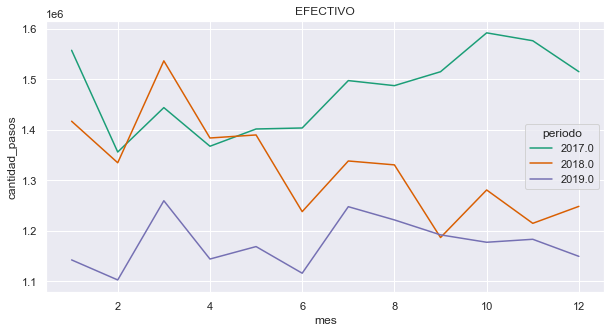

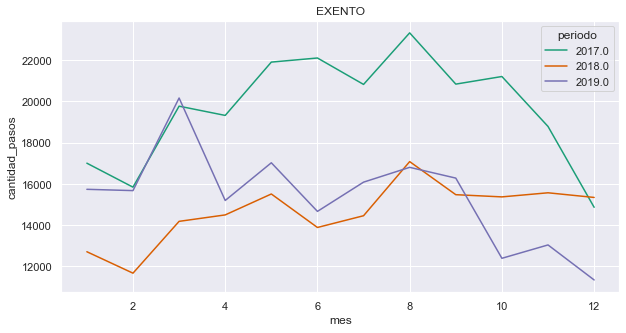

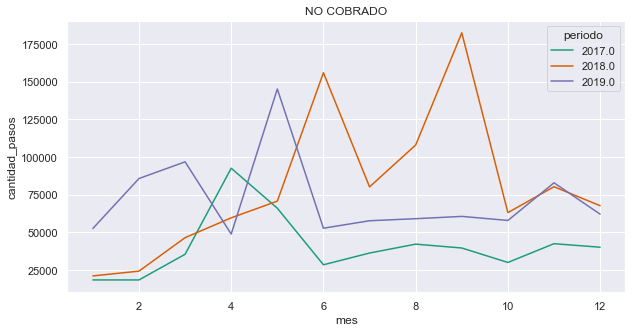

In [413]:
for i in pasos_fp.forma_pago.unique():
    forma = pasos_fp[pasos_fp.forma_pago == i]
    
    plt.figure(figsize = (10,5))
    plt.title(i)
    sns.lineplot( x = forma.mes, y = forma.cantidad_pasos, hue = forma.periodo, palette = 'Dark2')
    plt.show()

In [414]:
#verificamos que no haya nulo
data_pagos.isna().sum()

periodo           0
hora              0
estacion          0
forma_pago        0
cantidad_pasos    0
fecha             0
mes               0
dia               0
dtype: int64

In [415]:
# Interpolamos los Outliers
Q1 = data_pagos.cantidad_pasos.quantile(0.25)
Q3 = data_pagos.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1

data_pagos[(data_pagos.cantidad_pasos < (Q1 - 1.5*IQR)) | (data_pagos.cantidad_pasos > (Q3 + 1.5*IQR))] = np.nan
data_pagos = data_pagos.interpolate()

<ipython-input-415-dbf0b3c1b955>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Francisco\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [416]:
df_pagos = data_pagos.resample('D', on = 'fecha').sum()
df_pagos.drop(columns = ['periodo', 'hora', 'mes', 'dia'], inplace = True)
df_pagos.head()

,cantidad_pasos
fecha,
2017-01-01,1757.0
2017-01-02,4642.0
2017-01-03,5550.0
2017-01-04,4903.0
2017-01-05,5078.0


In [417]:
df_pagos_prophet = pd.DataFrame(df_pagos.groupby(df_pagos.index).sum().reset_index(), copy =True)

df_pagos_prophet.columns = ['ds', 'y']
df_pagos_prophet

,ds,y
0,2017-01-01,1757.0
1,2017-01-02,4642.0
2,2017-01-03,5550.0
3,2017-01-04,4903.0
4,2017-01-05,5078.0
...,...,...
1090,2019-12-27,2889.0
1091,2019-12-28,1160.0
1092,2019-12-29,1039.0
1093,2019-12-30,2470.0


In [418]:
train = pd.DataFrame(df_pagos_prophet.iloc[0:1003], copy = True)
test = pd.DataFrame(df_pagos_prophet.iloc[1003:1095], copy = True)

In [419]:
# Creamos el modelo
modelo_fp = Prophet(yearly_seasonality = True, weekly_seasonality= True, changepoint_prior_scale= 0.75, seasonality_prior_scale= 20)

# Lo entrenamos
modelo_fp.fit(train)

# Creamos un DF que genera las fechas del último trimestre de 2019.
future = modelo_fp.make_future_dataframe(periods=92)

# Generamos la prediccion del último trimestre de 2019 utilizando el modelo
predict_fp = modelo_fp.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [420]:
plot_plotly(modelo_fp, predict_fp)

In [421]:
# Calculamos el error predictivo del modelo 

print("ERRORES Modelo Prophet Illia agregando otros metodos de pago")
print("MAE:", mean_absolute_error(test.y, predict_fp.iloc[1003:1095].yhat))
print("RMSE:", mean_squared_error(test.y,  predict_fp.iloc[1003:1095].yhat , squared = False))

ERRORES Modelo Prophet Illia agregando otros metodos de pago
MAE: 610.7200595516052
RMSE: 903.8934600608695


### Pregunta 3: ¿mejora el modelo si incorporamos años anteriores?

Para resolver esta pregunta vamos a hacer un pipeline similar al de metodos de pagos pero ampliando la serie de tiempo. 

In [422]:
dataset.periodo.unique()

array([2019., 2018., 2017., 2016., 2015., 2014.])

In [423]:
df_años = dataset[dataset.forma_pago == 'EFECTIVO']

#Quitamos las columnas que no vamos a utilizar
df_años.drop(columns = ['periodo','hora','forma_pago', 'estacion'], inplace = True)

df_años.head()

C:\Users\Francisco\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dia,cantidad_pasos,fecha
80,Martes,537.0,2019-01-01
86,Martes,1.0,2019-01-01
88,Martes,443.0,2019-01-01
149,Martes,769.0,2019-01-01
155,Martes,7.0,2019-01-01


In [431]:
re_años = df_años.resample('D', on = 'fecha').sum()

In [432]:
# Interpolamos los Outliers
Q1 = re_años.cantidad_pasos.quantile(0.25)
Q3 = re_años.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1

re_años[(re_años.cantidad_pasos < (Q1 - 1.5*IQR)) | (re_años.cantidad_pasos > (Q3 + 1.5*IQR))] = np.nan
re_años = re_años.interpolate()

In [433]:
re_años_prophet = pd.DataFrame(re_años.groupby(re_años.index).sum().reset_index(), copy =True)

re_años_prophet.columns = ['ds', 'y']

In [453]:
train_años = pd.DataFrame(re_años_prophet.iloc[0:2099], copy = True)
test_años = pd.DataFrame(re_años_prophet.iloc[2099:2191], copy = True)


In [461]:
# Creamos el modelo
modelo_años = Prophet(yearly_seasonality = True, weekly_seasonality= True, changepoint_prior_scale= 0.75, seasonality_prior_scale= 20)

# Lo entrenamos
modelo_años.fit(train_años)

# Creamos un DF que genera las fechas del último trimestre de 2019.
future_años = modelo_años.make_future_dataframe(periods=92)

# Generamos la prediccion del último trimestre de 2019 utilizando el modelo
predict_años = modelo_años.predict(future_años)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [476]:
plot_plotly(modelo_años, predict_años)

In [463]:
print("ERRORES Modelo Prophet Illia agregando años anteriores")
print("MAE:", mean_absolute_error(test_años.y, predict_años.iloc[2099:2191].yhat))
print("RMSE:", mean_squared_error(test_años.y,  predict_años.iloc[2099:2191].yhat , squared = False))

ERRORES Modelo Prophet Illia agregando años anteriores
MAE: 4535.214713357714
RMSE: 5998.635604946168


### Pregunta 4: ¿ como funciona con ambas aplicaciones?
En este caso vamos a aplicar el mismo pipline agregando nuevos metodos de pago y años anteriores. 

In [472]:
print(dataset.isna().sum())
df_completo = dataset.resample('D', on = 'fecha').sum()
df_completo.drop(columns = ['hora', 'periodo'], inplace = True)
df_completo

periodo           0
hora              0
dia               0
estacion          0
forma_pago        0
cantidad_pasos    0
fecha             0
dtype: int64


,cantidad_pasos
fecha,
2014-01-01,10412.0
2014-01-02,28377.0
2014-01-03,59437.0
2014-01-04,47.0
2014-01-05,22.0
...,...
2019-12-27,43434.0
2019-12-28,29709.0
2019-12-29,27034.0


In [475]:
Q1 = df_completo.cantidad_pasos.quantile(0.25)
Q3 = df_completo.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1

df_completo[(df_completo.cantidad_pasos < (Q1 - 1.5*IQR)) | (df_completo.cantidad_pasos > (Q3 + 1.5*IQR))] = np.nan
df_completo = df_completo.interpolate()

In [479]:
df_completo_prophet = pd.DataFrame(df_completo.groupby(df_completo.index).sum().reset_index(), copy =True)

df_completo_prophet.columns = ['ds', 'y']

train_completo = pd.DataFrame(df_completo_prophet.iloc[0:2099], copy = True)
test_completo = pd.DataFrame(df_completo_prophet.iloc[2099:2191], copy = True)


modelo_completo = Prophet(yearly_seasonality = True, weekly_seasonality= True, changepoint_prior_scale= 0.75, seasonality_prior_scale= 20)


modelo_completo.fit(train_completo)


future_completo = modelo_completo.make_future_dataframe(periods=92)


predict_completo = modelo_completo.predict(future_completo)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [480]:
plot_plotly(modelo_completo, predict_completo)

In [481]:
print("ERRORES Modelo Prophet Illia agregando años anteriores")
print("MAE:", mean_absolute_error(test_completo.y, predict_completo.iloc[2099:2191].yhat))
print("RMSE:", mean_squared_error(test_completo.y,  predict_completo.iloc[2099:2191].yhat , squared = False))

ERRORES Modelo Prophet Illia agregando años anteriores
MAE: 8615.183544097832
RMSE: 10316.432937547605


# Conclusion proyecto final

En este proyecto teniamos como objetivo implementar nuevas formas para poder seguir descubriendo e investigando el dataset y la implementacion de nuevos modelos al que hicimos para el proyecto 3. 

como conclusiones podemos decir que pudimos mejorar el rendimiento solo en el modelo que le agregamos los metodos de pago, aun asi implementando el mismo pipline para todos. Tambien la incoporacion de la libreria prophet nos ayudo ya sea con el codigo, la prolijidad y tiempo requerido para elaborar los modelos, siempre teniendo en cuenta la necesidad de un pre-procesamiento exahustivo, por eso algunos aspectos para seguir implementando serian elaborar un pre-procesamiento de datos que permita la mejora del modelo sin ningun tipo de optimizacion. 

Tambien una curiosidad pendiente podria ser como hubiese reacccionado el modelo a un año pandemico como el 2020. 

Como reflexion en general, creo que este proyecto me sirvio para poder seguir sumergiendome y ampliando los conocimientos basicos, vistos en las bitacoras del sprint 3, por mi cuenta y aprender a buscar con mis propios medios nuevas librerias y maneras de mejorar los distintos modelos, tal como lo requiere un DataScientist. 